In [1]:
import pandas as pd
import numpy as np
import json
import gzip

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.axisbelow': True})

In [8]:
import scipy.stats

# Load the data

In [3]:
with gzip.open("botwiki-2019_tweets.json.gz") as f:
    botwiki = json.load(f)

botwiki_df = pd.DataFrame.from_records([item['user'] for item in botwiki])

In [5]:
botwiki_df.followers_count

0        23
1       322
2       171
3      3374
4         7
       ... 
693      14
694     186
695     406
696      11
697      55
Name: followers_count, Length: 698, dtype: int64

In [7]:
botwiki_df.friends_count

0       8
1       8
2      86
3       9
4       2
       ..
693     1
694    15
695     1
696     1
697     1
Name: friends_count, Length: 698, dtype: int64

Text(0, 0.5, 'Number of friends')

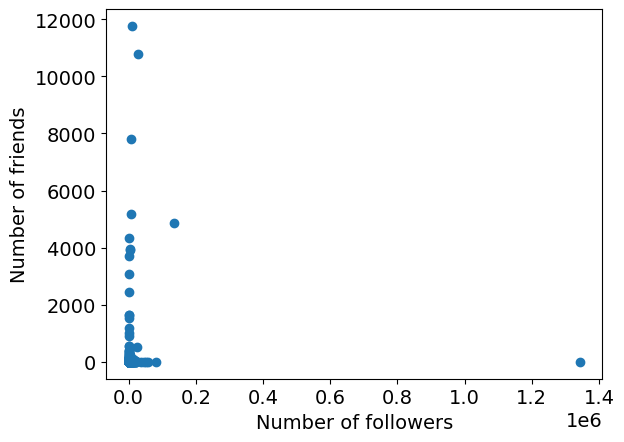

In [10]:
plt.scatter(
    botwiki_df.followers_count,
    botwiki_df.friends_count
)
plt.xlabel("Number of followers")
plt.ylabel("Number of friends")

Text(0, 0.5, 'Number of friends')

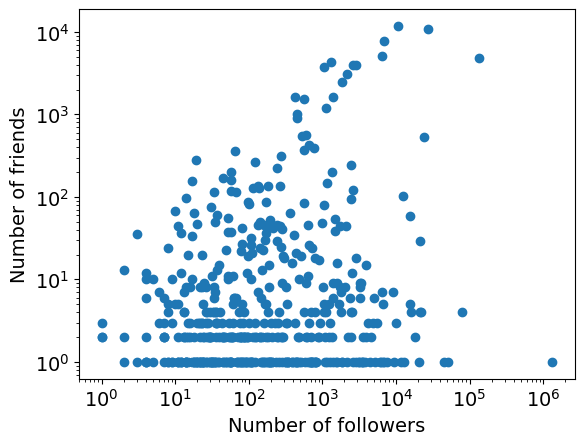

In [12]:
plt.scatter(
    botwiki_df.followers_count,
    botwiki_df.friends_count
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of followers")
plt.ylabel("Number of friends")

In [13]:
scipy.stats.spearmanr(
    botwiki_df.followers_count,
    botwiki_df.friends_count
)

SignificanceResult(statistic=np.float64(0.2728021178726365), pvalue=np.float64(2.2341190901787888e-13))

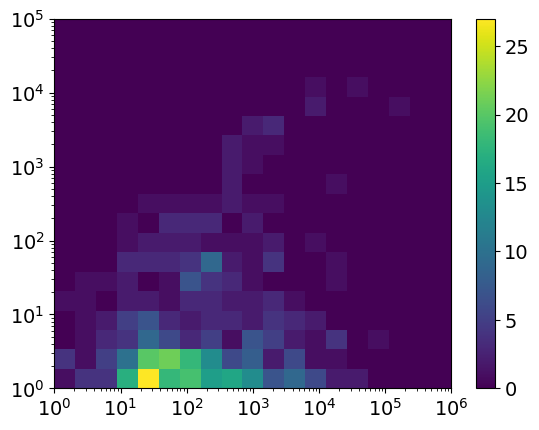

In [17]:
h = plt.hist2d(
    botwiki_df.followers_count,
    botwiki_df.friends_count,
    bins=[
        np.logspace(0, 6, 20),
        np.logspace(0, 5, 20)
    ]
)
plt.xscale("log")
plt.yscale("log")
plt.colorbar(h[3], ax=plt.gca())